In [1]:
import numpy as np
import scipy as sp
import unittest
from SimPEG import Mesh, Maps, Models, Utils
import inspect
import matplotlib.pyplot as plt
a = np.array([1, 1, 1])
b = np.array([1, 2])

mesh2 = Mesh.TensorMesh([a, b], x0=np.array([3, 5]))
mesh3 = Mesh.TensorMesh([a, b, [3, 4]], x0=np.array([3, 5, 2]))
mesh22 = Mesh.TensorMesh([b, a], x0=np.array([3, 5]))


In [3]:
# Create sub meshes offseted
mesh2b = Mesh.TensorMesh([np.r_[mesh2.hy,mesh2.hy], mesh2.hy], x0 = mesh2.x0)
mesh2b._x0[0] = mesh2b.x0[0]-2
actv2 = np.ones(mesh2.nC, dtype='bool')
actv2b = np.ones(mesh2b.nC, dtype='bool')
# Create model
m = np.ones(mesh2.nC)
m[4] = 2

M = Maps.Tile((mesh2, actv2), (mesh2b, actv2b))
mout = M.Paverage*m

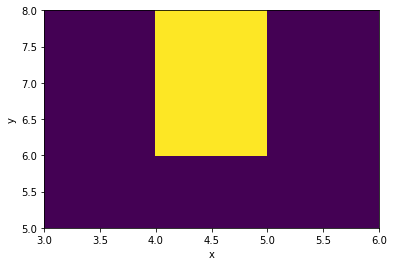

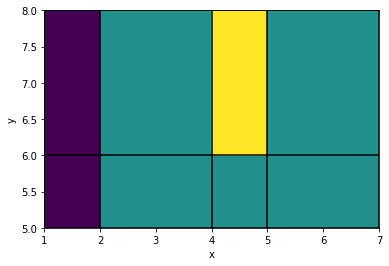

In [4]:
mesh2.plotImage(m)
plt.show()

mesh2b.plotImage(mout, grid='on')
plt.show()

In [5]:
mout[mout>0].max()

1.9999999900000001

In [6]:
tol = 1e-7

# Check that max and min model values are preserved
np.linalg.norm(mout[mout>0].min()-m.min()) < tol
np.linalg.norm(mout[mout>0].max()-m.max()) < tol

True

In [23]:
meshGlobal = Mesh.TensorMesh([np.ones(10),np.ones(10),np.ones(10)], x0='CCC')
meshLocal = Mesh.TensorMesh([np.ones(3)*3,np.ones(3)*3,np.ones(3)*3], x0='CCC')
actvGlobal = np.ones(meshGlobal.nC, dtype='bool')
actvLocal = np.ones(meshLocal.nC, dtype='bool')

M = Maps.Tile((meshGlobal, actvGlobal), (meshLocal, actvLocal))
M.nCell=100

m = np.zeros(meshGlobal.nC)
m[10*10*5 + 5*11] = 1
mout = M.Paverage*m

# meshGlobal.writeModelUBC('InterpModel.dat',m)
# meshGlobal.writeUBC('MeshGlobal.msh')

# meshLocal.writeModelUBC('InterpModelLocal.dat',mout)
# meshLocal.writeUBC('MeshLocal.msh')

m = np.ones(meshLocal.nC)
mout2 = M.Pvolume.T*m

# meshGlobal.writeModelUBC('InterpModel.dat',mout2)
# meshGlobal.writeUBC('MeshGlobal.msh')

# meshLocal.writeModelUBC('InterpModelLocal.dat',m)
# meshLocal.writeUBC('MeshLocal.msh')

In [18]:
M.Pvolume.T.sum()
1/27

0.037037037037037035

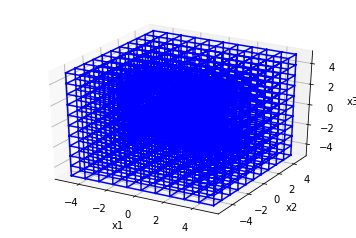

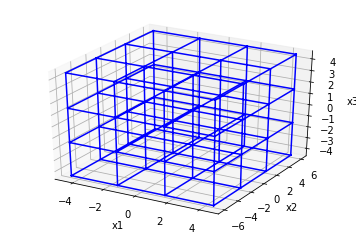

In [10]:
meshGlobal.plotGrid()
plt.show()

meshLocal.plotGrid()
plt.show()


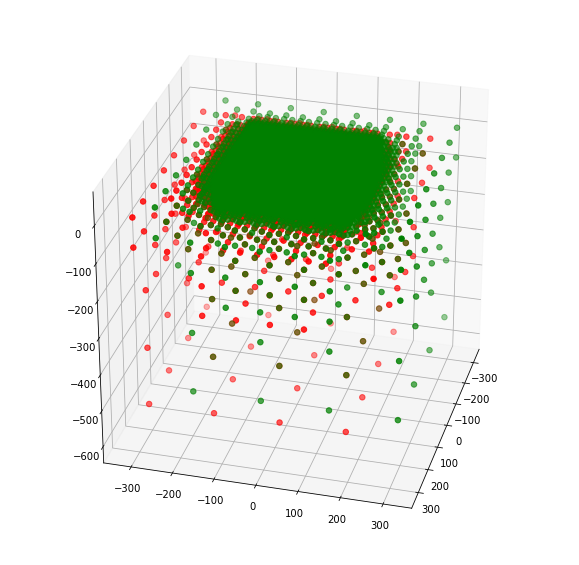

In [243]:
M.writeUBC('OctreeTest.msh')

In [244]:
np.savetxt('OctreeBswCorn.dat',bsw,fmt='%f')
np.savetxt('OctreeTneCorn.dat',tne,fmt='%f')
np.savetxt('OctreeCenter.dat',M.gridCC,fmt='%f')
np.savetxt('OctreeNodes.dat',M.gridN,fmt='%f')
